In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

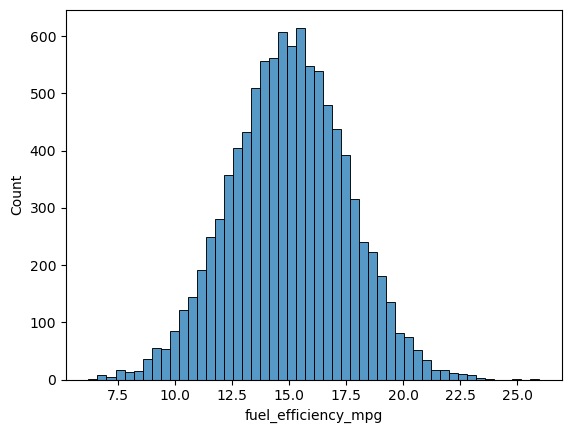

In [3]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

## Question 1

In [4]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']
df[base].isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

## Question 2

In [5]:
df.horsepower.median()

149.0

## Shuffling the data

In [6]:
n = len(df)
idx = np.arange(n)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [7]:
np.random.seed(42)
np.random.shuffle(idx)

In [8]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## Question 3

In [10]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [11]:
X_train_zeroes = df_train[base].fillna(0).values
X_train_mean = df_train[base].fillna(df_train[base].mean()).values

X_val_zeroes = df_val[base].fillna(0).values
X_val_mean = df_val[base].fillna(df_train[base].mean()).values

In [12]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values

In [13]:
w0_zeroes, w_zeroes = train_linear_regression(X_train_zeroes, y_train)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

y_pred_zeroes = w0_zeroes + X_val_zeroes.dot(w_zeroes)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

In [14]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [15]:
round(rmse(y_val, y_pred_zeroes), 2)

np.float64(0.52)

In [16]:
round(rmse(y_val, y_pred_mean), 2)

np.float64(0.46)

## Question 4

In [17]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [18]:
X_train_reg = df_train[base].fillna(0).values
X_val_reg = df_val[base].fillna(0).values

# Probar diferentes valores de r
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
results = {}

for r in r_values:
    w0, w = train_linear_regression_reg(X_train_reg, y_train, r=r)
    y_pred = w0 + X_val_reg.dot(w)
    score = rmse(y_val, y_pred)
    results[r] = round(score, 2)
    print(f"r={r}: RMSE={round(score, 2)}")

best_r = min(results, key=results.get)
print(f"\nBest r: {best_r}")

r=0: RMSE=0.52
r=0.01: RMSE=0.52
r=0.1: RMSE=0.52
r=1: RMSE=0.52
r=5: RMSE=0.52
r=10: RMSE=0.52
r=100: RMSE=0.52

Best r: 0


## Question 5

In [19]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
rmse_scores = []

for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx].reset_index(drop=True)

    df_train_s = df_shuffled.iloc[:n_train].reset_index(drop=True)
    df_val_s = df_shuffled.iloc[n_train:n_train + n_val].reset_index(drop=True)

    y_train_s = df_train_s['fuel_efficiency_mpg'].values
    y_val_s = df_val_s['fuel_efficiency_mpg'].values

    X_train_s = df_train_s.drop('fuel_efficiency_mpg', axis=1).fillna(0).values
    X_val_s = df_val_s.drop('fuel_efficiency_mpg', axis=1).fillna(0).values

    w0, w = train_linear_regression(X_train_s, y_train_s)
    y_pred = w0 + X_val_s.dot(w)

    score = rmse(y_val_s, y_pred)
    rmse_scores.append(score)

    print(f"Seed {seed}: RMSE={score}")

std = np.std(rmse_scores)
print(f"\nStandard deviation: {std} (≈ {round(std, 3)})")

Seed 0: RMSE=0.5206531296286018
Seed 1: RMSE=0.5213388912861504
Seed 2: RMSE=0.5228069974692388
Seed 3: RMSE=0.5159516741085217
Seed 4: RMSE=0.5109129460088697
Seed 5: RMSE=0.5283406460156541
Seed 6: RMSE=0.531391065815884
Seed 7: RMSE=0.509067038737912
Seed 8: RMSE=0.5147399129397889
Seed 9: RMSE=0.5131865908276104

Standard deviation: 0.006989446427001858 (≈ 0.007)


## Question 6

In [20]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx].reset_index(drop=True)

df_train_final = df_shuffled.iloc[:n_train].reset_index(drop=True)
df_val_final = df_shuffled.iloc[n_train:n_train + n_val].reset_index(drop=True)
df_test_final = df_shuffled.iloc[n_train + n_val:].reset_index(drop=True)

df_full_train = pd.concat([df_train_final, df_val_final]).reset_index(drop=True)

y_full_train = df_full_train['fuel_efficiency_mpg'].values
y_test_final = df_test_final['fuel_efficiency_mpg'].values

X_full_train = df_full_train.drop('fuel_efficiency_mpg', axis=1).fillna(0).values
X_test_final = df_test_final.drop('fuel_efficiency_mpg', axis=1).fillna(0).values

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
y_pred_test = w0 + X_test_final.dot(w)

rmse_test = rmse(y_test_final, y_pred_test)
print(f"RMSE on test set: {rmse_test}")

RMSE on test set: 0.5156261299185212
